In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
# from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
# import warnings

In [2]:
df = pd.read_csv('data/cars45_data_cleaned.csv')

In [3]:
# df['Year of manufacture'] = df['Year of manufacture'].astype('object')

In [4]:
df.describe()

,price,Year_of_manufacture,Mileage,Engine_size
count,2.250000e+03,2250.000000,2.250000e+03,2250.000000
mean,8.946298e+06,2008.278222,2.304656e+05,2852.960889
std,5.665963e+06,4.619243,4.755872e+05,821.003749
min,1.470000e+06,1984.000000,1.000000e+00,1000.000000
25%,4.725000e+06,2005.000000,1.318268e+05,2400.000000
50%,7.280000e+06,2008.000000,1.957640e+05,3000.000000
75%,1.155000e+07,2011.000000,2.712198e+05,3500.000000
max,2.761500e+07,2023.000000,2.070052e+07,5700.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2250 non-null   int64  
 1   fuel_type            2250 non-null   object 
 2   gear_type            2250 non-null   object 
 3   Make                 2250 non-null   object 
 4   Year_of_manufacture  2250 non-null   int64  
 5   Condition            2250 non-null   object 
 6   Mileage              2250 non-null   float64
 7   Engine_size          2250 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 140.8+ KB


In [6]:
# X = df.drop(['price'], axis=1)
# y = df['price']

In [7]:
# X

In [8]:
# y

In [9]:
num_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns
num_features

Index(['price', 'Year_of_manufacture', 'Mileage', 'Engine_size'], dtype='object')

In [11]:
encoded_X = pd.get_dummies(df, columns=['fuel_type', 'gear_type', 'Make', 'Condition'], drop_first=True)
encoded_X

,price,Year_of_manufacture,Mileage,Engine_size,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Petrol,gear_type_Automatic,gear_type_CVT,gear_type_Manual,...,Make_Seat,Make_Skoda,Make_SsangYong,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Condition_Foreign Used,Condition_Local Used
0,10500000,2014,210544.0,2000.0,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,22050000,2015,20655.0,2000.0,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,6930000,2009,97225.0,1800.0,False,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,13125009,2007,266868.0,5300.0,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,10500000,2013,154962.0,1600.0,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,5250000,2004,159250.0,2400.0,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2246,2520000,2000,228834.0,3500.0,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2247,3360000,2004,166642.0,2400.0,False,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,True
2248,2100000,1997,164169.0,2100.0,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [12]:
X = encoded_X.drop(['price'], axis=1)
y = encoded_X['price']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

,Year_of_manufacture,Mileage,Engine_size,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Petrol,gear_type_Automatic,gear_type_CVT,gear_type_Manual,Make_Audi,...,Make_Seat,Make_Skoda,Make_SsangYong,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Condition_Foreign Used,Condition_Local Used
322,2013,113223.0,1800.0,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
930,2004,411880.0,1800.0,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1537,2009,342649.0,2400.0,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
77,2014,199746.0,4400.0,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
868,2003,168292.0,3500.0,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2008,112327.0,3000.0,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1731,2010,190532.0,3500.0,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
763,2011,155790.0,2000.0,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
835,2007,283171.0,3000.0,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_arr = scaler.fit_transform(X_train)
X_test_arr = scaler.transform(X_test)


In [15]:
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [16]:
# scaler2 = StandardScaler()
# y_train_arr = scaler2.fit_transform(y_train.reshape(-1, 1))
# y_test_arr = scaler2.transform(y_test.reshape(-1, 1))

In [17]:
reg2 = LinearRegression()
reg2.fit(X_train_arr, y_train)

LinearRegression()

In [18]:
reg2.score(X_test_arr, y_test)

0.6805902791728708

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_arr, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_arr)
    y_test_pred = model.predict(X_test_arr)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3127567.5973
- Mean Absolute Error: 2304190.8957
- R2 Score: 0.6816
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3457112.1736
- Mean Absolute Error: 2432437.6194
- R2 Score: 0.6806


Lasso
Model performance for Training set
- Root Mean Squared Error: 3127567.5974
- Mean Absolute Error: 2304190.6200
- R2 Score: 0.6816
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3457111.7708
- Mean Absolute Error: 2432435.9582
- R2 Score: 0.6806


Ridge
Model performance for Training set
- Root Mean Squared Error: 3127572.1384
- Mean Absolute Error: 2303942.1017
- R2 Score: 0.6816
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3457582.5297
- Mean Absolute Error: 2432621.4541
- R2 Score: 0.6805


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2441399

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.770679
6,XGBRegressor,0.760043
3,K-Neighbors Regressor,0.715792
1,Lasso,0.680590
0,Linear Regression,0.680590
2,Ridge,0.680503
4,Decision Tree,0.640317
7,AdaBoost Regressor,0.560614


In [22]:
param  = {"Random Forest":{
                    'criterion':['poisson'],
                    'max_features':['sqrt'],
                    'n_estimators': [300]
                    }
                    }

In [23]:
from sklearn.model_selection import GridSearchCV
def evaluate_models(X_train, y_train,X_test,y_test,models,param):
    report = {}

    for i in range(len(list(models))):
        model = list(models.values())[i]
        para=param[list(models.keys())[i]]

        gs = GridSearchCV(model,para,cv=3)
        gs.fit(X_train,y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train,y_train)
        print(gs.best_params_)

        #model.fit(X_train, y_train)  # Train model

        y_train_pred = model.predict(X_train)

        y_test_pred = model.predict(X_test)

        train_model_score = r2_score(y_train, y_train_pred)

        test_model_score = r2_score(y_test, y_test_pred)

        report[list(models.keys())[i]] = test_model_score

    return report

In [24]:
models = {
                "Random Forest": RandomForestRegressor()
            }

In [25]:
model_report:dict=evaluate_models(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,param=param)
## To get best model score from dict
best_model_score = max(sorted(model_report.values()))

## To get best model name from dict

best_model_name = list(model_report.keys())[
    list(model_report.values()).index(best_model_score)
]
best_model = models[best_model_name]

{'criterion': 'poisson', 'max_features': 'sqrt', 'n_estimators': 300}


In [26]:
print(best_model_name, best_model_score)

Random Forest 0.7786425921369866


In [27]:
import pickle
folder = '../artifacts/car_price_prediction_model.pkl'

with open(folder, "wb") as file_obj:
            pickle.dump(best_model, file_obj)

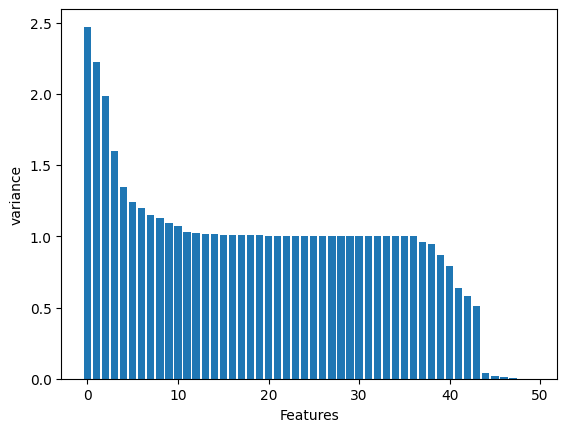

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_arr)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xlabel('Features')
plt.ylabel('variance')
plt.show()

In [37]:
pca = PCA(n_components=5)
pca.fit(X_train_arr)

PCA(n_components=5)

In [38]:
trans_X_train_arr = pca.transform(X_train_arr)
trans_X_test_arr = pca.transform(X_test_arr)
print(trans_X_test_arr.shape)

(450, 5)


In [39]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(trans_X_train_arr, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(trans_X_train_arr)
    y_test_pred = model.predict(trans_X_test_arr)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4263254.9735
- Mean Absolute Error: 3171972.4554
- R2 Score: 0.4084
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4618667.5126
- Mean Absolute Error: 3313314.1464
- R2 Score: 0.4299


Lasso
Model performance for Training set
- Root Mean Squared Error: 4263254.9735
- Mean Absolute Error: 3171972.4681
- R2 Score: 0.4084
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4618667.6513
- Mean Absolute Error: 3313314.3558
- R2 Score: 0.4299


Ridge
Model performance for Training set
- Root Mean Squared Error: 4263255.0769
- Mean Absolute Error: 3172011.6145
- R2 Score: 0.4084
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4618758.5014
- Mean Absolute Error: 3313449.9211
- R2 Score: 0.4299


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2479501

In [41]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.739092
6,XGBRegressor,0.727262
3,K-Neighbors Regressor,0.694304
4,Decision Tree,0.564121
7,AdaBoost Regressor,0.560043
0,Linear Regression,0.429895
1,Lasso,0.429895
2,Ridge,0.429873


In [ ]:
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)

params={
                "Random Forest":{
                    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                    'max_features':['sqrt','log2',None],
                    'n_estimators': [8,16,32,64,128,256]
                }#,
                # "Decision Tree": {
                #     'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                #     # 'splitter':['best','random'],
                #     # 'max_features':['sqrt','log2'],
                # },
                # "Gradient Boosting":{
                #     # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                #     'learning_rate':[.1,.01,.05,.001],
                #     'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                #     # 'criterion':['squared_error', 'friedman_mse'],
                #     # 'max_features':['auto','sqrt','log2'],
                #     'n_estimators': [8,16,32,64,128,256]
                # },
                # "Linear Regression":{},
                # "XGBRegressor":{
                #     'learning_rate':[.1,.01,.05,.001],
                #     'n_estimators': [8,16,32,64,128,256]
                # },
                # # "CatBoosting Regressor":{
                # #     'depth': [6,8,10],
                # #     'learning_rate': [0.01, 0.05, 0.1],
                # #     'iterations': [30, 50, 100]
                # # },
                # "AdaBoost Regressor":{
                #     'learning_rate':[.1,.01,0.5,.001],
                #     # 'loss':['linear','square','exponential'],
                #     'n_estimators': [8,16,32,64,128,256]
                # }
                
            }

In [49]:

models = {
                "Random Forest": RandomForestRegressor(),
                # "Decision Tree": DecisionTreeRegressor(),
                # "Gradient Boosting": GradientBoostingRegressor(),
                # "Linear Regression": LinearRegression(),
                # "XGBRegressor": XGBRegressor(),
                # # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
                # "AdaBoost Regressor": AdaBoostRegressor(),
            }

print(params)
print(models)

{'Random Forest': {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_features': ['sqrt', 'log2', None], 'n_estimators': [8, 16, 32, 64, 128, 256]}}
{'Random Forest': RandomForestRegressor()}


In [52]:
model_report:dict=evaluate_models(X_train=trans_X_train_arr,y_train=y_train,X_test=trans_X_test_arr,y_test=y_test,
                                             models=models,param=param)
## To get best model score from dict
best_model_score = max(sorted(model_report.values()))

## To get best model name from dict

best_model_name = list(model_report.keys())[
    list(model_report.values()).index(best_model_score)
]
best_model = models[best_model_name]

{'criterion': 'poisson', 'max_features': 'sqrt', 'n_estimators': 300}


In [51]:
print(best_model_name, best_model_score)

Random Forest 0.7339107204218598
